## Drugs Prediction

The idea of this project is to build a model to discover an ideal drug for a new patient, based on a data set with information from patients with the same disease, in which each patient responded to one of the five drugs.

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

## Configure Matplotlib

In [2]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

## Load data

In [3]:
df_drugs = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv")

# Variables
print("Drugs dataset has {} data points with {} variables each.".format(*df_drugs.shape))

Drugs dataset has 200 data points with 6 variables each.


## Data description

This dataset contains information about 200 patients, therefore we have 200 rows and 6 columns:

Age : Age of the Patient 

Sex : Gender of the Patient 

BP : Blood Pressure of the Patient 

Cholesterol: Cholesterol of the Patient 

Na_to_K: Sodium to Potasium Levels Please note all patients in the dataset have the same illness

Drug: Drug each patient responded to 

## Explore data

In [4]:
df_drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# data types of columns
df_drugs.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
# Check missing value
df_drugs.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Prepare Dataset for Modeling

In [7]:
X = df_drugs[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [9]:
y = df_drugs["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Descriptive Statistics

In this section we will calculate the descriptive statistics: minimum, maximum, average, median and the standard deviation of 'PRICE', which is stored in prices.

In [10]:
df_drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Shuffle and Split Data

In [11]:
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

## Create Model

In [12]:
# Create DecisionTreeClassifier Instance
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
drugTree
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##  Accuracy

In [13]:
pred_model = drugTree.predict(X_test)
print()
print('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)))


Accuracy of the model is 98%


## Visualize Decision Tree

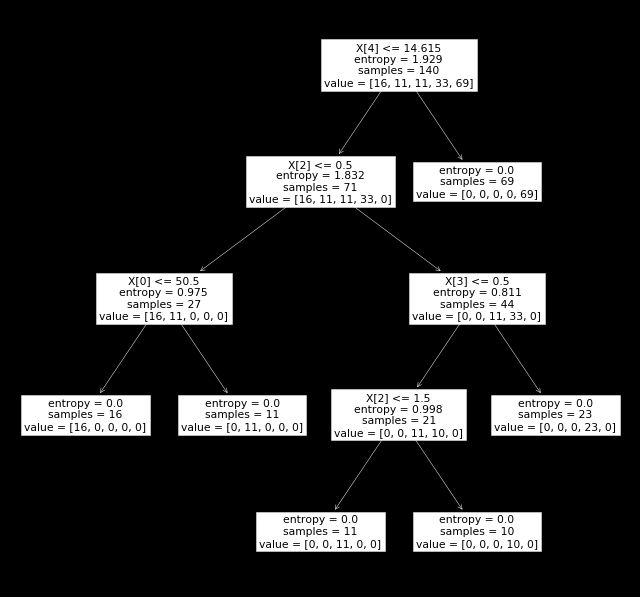

In [14]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
plot_tree(drugTree, rotate=True, ax=ax);
plt.show()